# Imports and Functions

In [1]:
#Imports
import pandas as pd
from sklearn.preprocessing import StandardScaler #why standard not minmax?
import os #for viewing HTML in web browser
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
'''
Function: Create a df
Inputs: filepath
Outputs: df
'''

def create_df(filepath):
    df = pd.read_csv(filepath[0]) #I think the filepath is a tuple? Unsure why

    return df

In [3]:
'''
Function: Convert the df to HTML, then get the full HTML address so 
that you can open it in a browser window and see all the rows and columns easily.
Inputs: df
Outputs: HTML address
'''
def to_html(df):
    df.to_html('df_view.html')
    full_path = os.path.abspath('df_view.html')
    print(full_path)

# Load data

### *When re-starting to see if new changes work, restart from the cell under this. This loads the file again so that we create the df from scratch, which prevents us from any issues that would have stemmed from the inplace df changes later on*

In [4]:
#Load file
filepath=('/Users/kyli/Desktop/csv_baseline_data_tall_v001.csv',)

In [5]:
df = create_df(filepath)

In [6]:
to_html(df)

/Users/kyli/Documents/GitHub/Sleep-Analysis/df_view.html


# K Means Clustering

In [7]:
df_k_means = df.filter(items=['HourOfDay', 'CumulativeHour', 'PercentSleep'])

In [8]:
df_k_means.dropna(how='all', inplace=True) #Drop any rows or columns that have all NaNs. There won't be any cols with all NaNs,
#But there will be rows

In [9]:
to_html(df_k_means) #Look at the df in a different tab to ensure it looks normal

/Users/kyli/Documents/GitHub/Sleep-Analysis/df_view.html


In [10]:
#Get rid of NaNs by making all NaNs equal to the mean 
df_k_means['PercentSleep'].fillna(df_k_means['PercentSleep'].mean(), inplace=True)

/var/folders/nd/x23hpv_d1x742np3nmrj07240000gp/T/ipykernel_8779/3940720461.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_k_means['PercentSleep'].fillna(df_k_means['PercentSleep'].mean(), inplace=True)


In [11]:
#Look at k_means without Nans
to_html(df_k_means)
#Should find a better way to visualize this so I see if its actually doing anything

/Users/kyli/Documents/GitHub/Sleep-Analysis/df_view.html


In [12]:
# Standardize data (K-Means works best with normalized data)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_k_means)

In [13]:
# Run K-Means
optimal_k = 3  # Assume we chose 3 from the Elbow Method
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
clusters = kmeans.fit_predict(df_scaled)

In [15]:
df_k_means['Cluster'] = clusters  # Assign clusters to original DataFrame
df_k_means['Mouse_ID'] = df['UniqueMouse']  # Restore Mouse_ID for tracking


In [16]:
#Look at final df
to_html(df_k_means)

/Users/kyli/Documents/GitHub/Sleep-Analysis/df_view.html


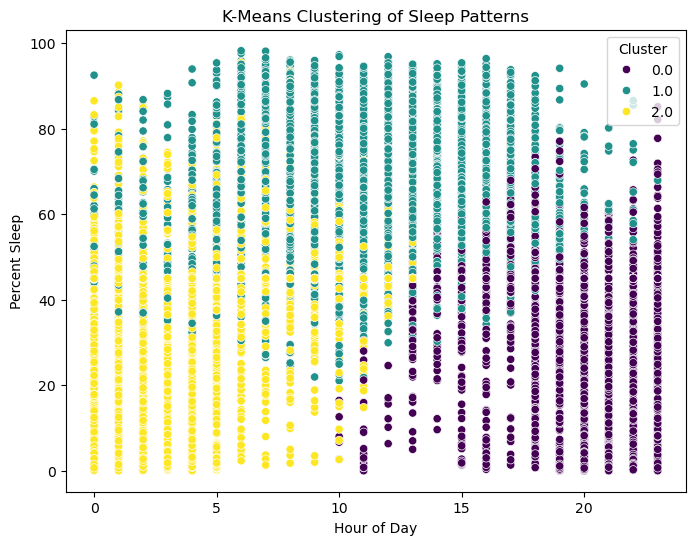

In [20]:
#Visualization of clusters themselves
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['HourOfDay'], y=df_k_means['PercentSleep'], hue=df_k_means['Cluster'], palette="viridis")
plt.xlabel("Hour of Day")
plt.ylabel("Percent Sleep")
plt.title("K-Means Clustering of Sleep Patterns")
plt.legend(title="Cluster")
plt.show()

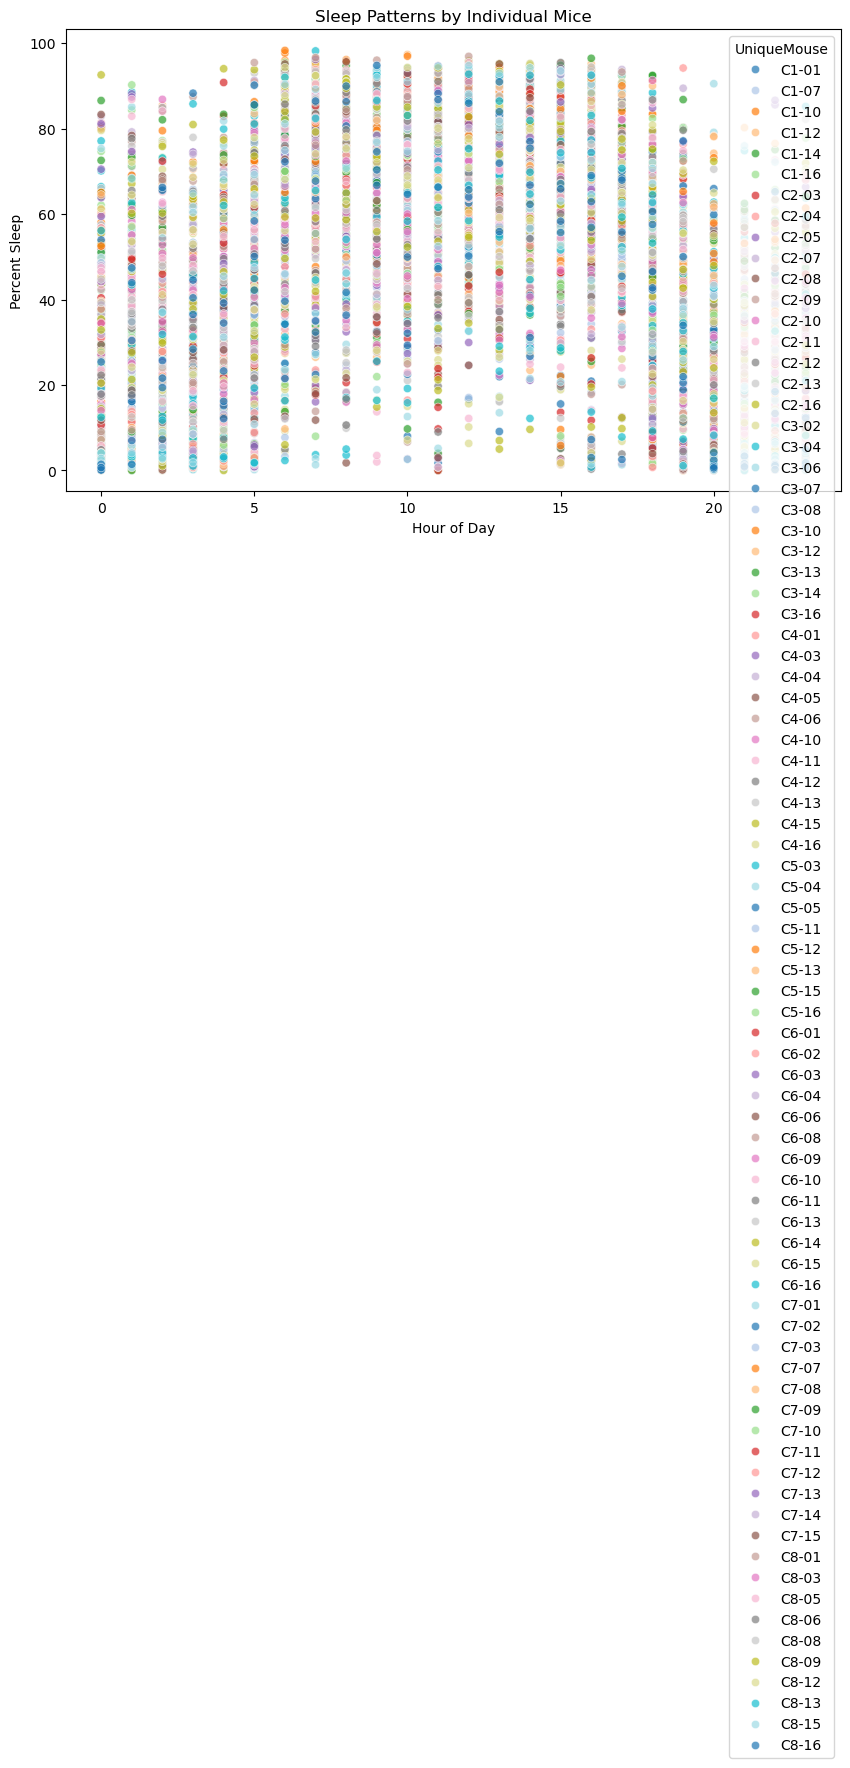

In [30]:
#Cluster by each unique mouse

# Set figure size
plt.figure(figsize=(10, 6))

# Scatter plot with individual mice colors
sns.scatterplot(data=df, x='HourOfDay', y='PercentSleep', hue='UniqueMouse', palette='tab20', alpha=0.7)

# Labels and title
plt.xlabel("Hour of Day")
plt.ylabel("Percent Sleep")
plt.title("Sleep Patterns by Individual Mice")
#plt.legend(title="Mouse ID", bbox_to_anchor=(1.05, 1), loc='lower left')  # Move legend outside
plt.show()


# Hierarchical Clustering

In [24]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
import seaborn as sns

# Select numerical features for clustering
df_hier = df[['PercentSleep', 'HourOfDay', 'CumulativeHour']]

# Standardize data (important for distance-based methods)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_hier)


In [25]:
# Compute hierarchical clustering
linked = linkage(df_scaled, method='ward')

# Plot dendrogram
plt.figure(figsize=(10, 6))
dendrogram(linked)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Mouse Observations")
plt.ylabel("Cluster Distance")
plt.show()


ValueError: The condensed distance matrix must contain only finite values.

# Track Sleep Patterns Over Time